In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Problem parameters
x_range = (-1000, 1000)

# User defined parameters
pop_size = 100
generations = 500
mutation_rate = 0.45

In [3]:
# Setting the parameters for f-strings
decimal_places = 15
len1 = len(str(abs(x_range[0]))); len2 = len(str(abs(x_range[1])))
digits =  len1 if len1 >= len2 else len2
total_places = decimal_places + digits + 2 #2 accounts for both the decimal point and the sign

In [4]:
# Function to generate the population
def generate_population(size:int) -> list:
    return [random.uniform(x_range[0], x_range[1]+1e-6) for _ in range(size)]

In [5]:
# First objective function
def f1(x:float) -> float:
    return x ** 2

In [6]:
# Second objective function
def f2(x:float) -> float:
    return (x - 2) ** 2

In [7]:
# Function to determine the set of non-dominated Pareto-optimal solutions
def generate_paretoSet(population:list, objective_values:list[tuple], size:int) -> list:
    pareto_set = []
    
    for i in range(size):
        is_Pareto = True
        for j in range(size):
            if (i!=j) and (objective_values[i][0]<objective_values[j][0]) and (objective_values[i][1]<=objective_values[j][1]):
                is_Pareto = False
                break
        if is_Pareto:
            pareto_set.append(population[i])
    
    return pareto_set

In [8]:
# Function to calculate the selection probabilities of each element in population
def get_probability(size:int) -> list:
    temp = [random.uniform(-1, 1) for _ in range(size)] # Weights are generated
    weight_sum = sum(temp)
    temp = [weight/weight_sum for weight in temp] # Fitness values are calculated
    min_fitness = min(temp)
    temp = [fitness_value - min_fitness for fitness_value in temp] # Difference is calculated for probability calculation
    difference_sum = sum(temp)
    temp = [difference/difference_sum for difference in temp] # Probability is calculated
    return temp

In [9]:
# Function to select a parent based on roulette-wheel selection algorithm
def roulette_wheel_selection(probability_values:list, size:int) -> int:
    cumulative_probability = 0
    randNum = random.uniform(0.0, 1.0)
    indx = -1
    
    while (indx := indx+1) < size:
        cumulative_probability += probability_values[indx]
        if cumulative_probability >= randNum:
            break
    
    return indx

In [10]:
# Function to perform two-point cross-over
def cross_over(x1:float, x2:float) -> tuple:
    x1Str = f'{x1:+0{total_places}.{decimal_places}f}'
    x2Str = f'{x2:+0{total_places}.{decimal_places}f}'
    
    indx1 = random.randint(0, total_places-1)
    indx2 = random.randint(0, total_places-1)
    if indx1 > indx2:
        indx1, indx2 = indx2, indx1
    
    offspring1 = x1Str[:indx1] + x2Str[indx1:indx2] + x1Str[indx2:]
    offspring2 = x2Str[:indx1] + x1Str[indx1:indx2] + x2Str[indx2:]
    
    return (offspring1, offspring2)

In [11]:
# Function to generate mutant pair of offsprings
def get_mutants(x1:float, x2:float) -> tuple:
    digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    def mutate(charList:list) -> None:
        for i in range(total_places):
            if (i==0 or i==1 or i==5):
                continue
            else:
                if(random.random() >= mutation_rate):
                    charList[i] = random.choice(digits)
    
    x1CharList, x2CharList = cross_over(x1, x2)
    x1CharList = list(x1CharList)
    x2CharList = list(x2CharList)
    
    mutate(x1CharList)
    mutate(x2CharList)
    
    x1CharList = ''.join(x1CharList)
    x2CharList = ''.join(x2CharList)
    
    return (float(x1CharList), float(x2CharList))

In [12]:
# Generate initial population
population = generate_population(pop_size)

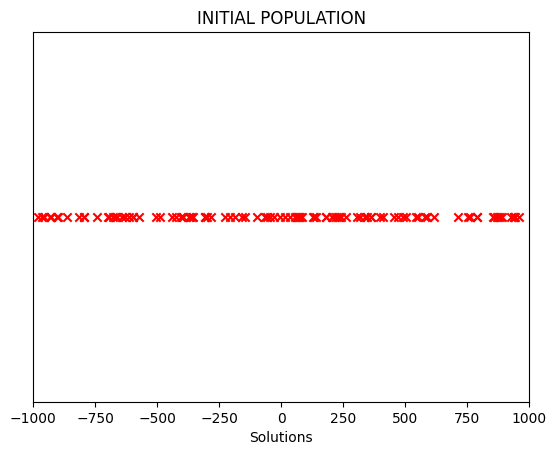

In [13]:
# Plot the values in the population on the number line
plt.scatter(population, [0]*pop_size, c='r', marker='x')
plt.yticks([])
plt.xlim(x_range[0], x_range[1])
plt.xlabel('Solutions')
plt.title('INITIAL POPULATION')
plt.show()

In [14]:
# Evolution algorithm
for _ in range(generations):
    objective_values = [(f1(val), f2(val)) for val in population]
    paretoSet = generate_paretoSet(population, objective_values, pop_size) # Tentative Pareto-optimal solutions set
    probability_values = get_probability(pop_size)
    
    offsprings = []
    for _ in range(pop_size // 2):
        parent1 = population[roulette_wheel_selection(probability_values, pop_size)]
        parent2 = population[roulette_wheel_selection(probability_values, pop_size)]
        child1, child2 = get_mutants(parent1, parent2)
        offsprings.append(child1)
        offsprings.append(child2)
    
    # Elitist strategy to conserve the best solutions
    population += offsprings
    selection_value = pop_size - len(paretoSet)
    population = random.sample(population, k=selection_value)
    population += paretoSet
    

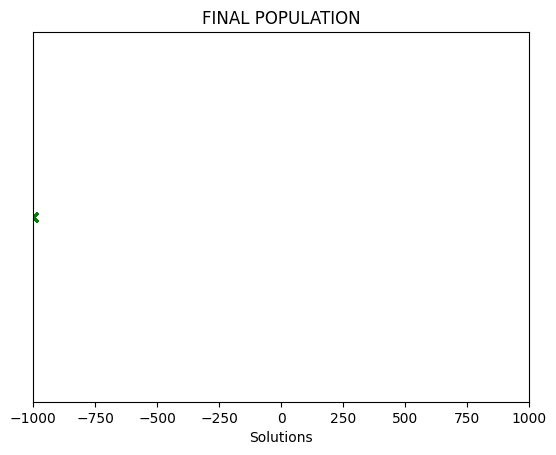

In [15]:
# Plot the values in the final updated population
plt.scatter(population, [0]*pop_size, c='g', marker='x')
plt.yticks([])
plt.xlim(x_range[0], x_range[1])
plt.xlabel('Solutions')
plt.title('FINAL POPULATION')
plt.show()